In [19]:
import pandas as pd
import numpy as np

#from imblearn.under_sampling import TomekLinks

In [20]:
db = pd.read_csv('final_data_input_LAST_FINAL.csv')

In [21]:
db.head()

,Unnamed: 0,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,136084,0,0,0,0,0,0,1,0,0,...,-0.926752,-0.178917,-0.237048,-0.239838,-0.226448,-0.159619,1.363765,-0.036417,0.026988,Malicious
1,68199,0,0,1,0,0,0,0,0,1,...,0.881231,-0.178941,-0.244508,-0.239601,-0.221614,-0.159611,-0.542685,0.643204,-0.361626,Malicious
2,130363,0,1,0,0,0,0,0,0,1,...,-0.871406,-0.178933,-0.241448,-0.239463,-0.222830,-0.159270,0.363285,0.214765,-0.229638,Malicious
3,162427,0,0,0,0,0,0,1,0,1,...,0.882289,-0.178940,-0.244177,-0.239452,-0.221581,-0.159618,-0.434353,0.618959,-0.355394,Malicious
4,197377,0,1,0,0,0,0,0,0,1,...,0.898461,-0.178940,-0.244234,-0.240188,-0.221618,-0.159629,-0.859967,0.445261,-0.304487,Malicious


In [22]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D

import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [24]:
db = db.iloc[:,1:46]

In [25]:
db = db.iloc[:,0:45]

In [26]:
db

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,1,...,-0.926752,-0.178917,-0.237048,-0.239838,-0.226448,-0.159619,1.363765,-0.036417,0.026988,Malicious
1,0,0,1,0,0,0,0,0,1,0,...,0.881231,-0.178941,-0.244508,-0.239601,-0.221614,-0.159611,-0.542685,0.643204,-0.361626,Malicious
2,0,1,0,0,0,0,0,0,1,0,...,-0.871406,-0.178933,-0.241448,-0.239463,-0.222830,-0.159270,0.363285,0.214765,-0.229638,Malicious
3,0,0,0,0,0,0,1,0,1,0,...,0.882289,-0.178940,-0.244177,-0.239452,-0.221581,-0.159618,-0.434353,0.618959,-0.355394,Malicious
4,0,1,0,0,0,0,0,0,1,0,...,0.898461,-0.178940,-0.244234,-0.240188,-0.221618,-0.159629,-0.859967,0.445261,-0.304487,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,0,1,0,0,0,0,0,0,1,0,...,-1.022086,5.356623,5.478379,3.598343,4.540283,-0.159634,-0.808145,0.510802,-0.325096,Malicious
269639,0,0,0,0,0,1,0,0,0,0,...,0.437349,-0.178941,-0.244718,-0.240397,-0.222224,-0.159625,-0.634521,0.470405,-0.313237,Malicious
269640,0,0,0,1,0,0,0,0,1,0,...,-0.370380,-0.156436,0.115073,-0.155854,-0.221412,-0.159625,1.052107,-0.143501,0.221870,Malicious
269641,0,1,0,0,0,0,0,0,1,0,...,1.146730,-0.053332,0.612724,-0.113581,-0.221596,-0.159624,0.759412,-0.280718,0.731200,Malicious


In [27]:
x1 = db.iloc[:,0:45]

In [28]:
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,1,...,-0.926752,-0.178917,-0.237048,-0.239838,-0.226448,-0.159619,1.363765,-0.036417,0.026988,Malicious
1,0,0,1,0,0,0,0,0,1,0,...,0.881231,-0.178941,-0.244508,-0.239601,-0.221614,-0.159611,-0.542685,0.643204,-0.361626,Malicious
2,0,1,0,0,0,0,0,0,1,0,...,-0.871406,-0.178933,-0.241448,-0.239463,-0.222830,-0.159270,0.363285,0.214765,-0.229638,Malicious
3,0,0,0,0,0,0,1,0,1,0,...,0.882289,-0.178940,-0.244177,-0.239452,-0.221581,-0.159618,-0.434353,0.618959,-0.355394,Malicious
4,0,1,0,0,0,0,0,0,1,0,...,0.898461,-0.178940,-0.244234,-0.240188,-0.221618,-0.159629,-0.859967,0.445261,-0.304487,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,0,1,0,0,0,0,0,0,1,0,...,-1.022086,5.356623,5.478379,3.598343,4.540283,-0.159634,-0.808145,0.510802,-0.325096,Malicious
269639,0,0,0,0,0,1,0,0,0,0,...,0.437349,-0.178941,-0.244718,-0.240397,-0.222224,-0.159625,-0.634521,0.470405,-0.313237,Malicious
269640,0,0,0,1,0,0,0,0,1,0,...,-0.370380,-0.156436,0.115073,-0.155854,-0.221412,-0.159625,1.052107,-0.143501,0.221870,Malicious
269641,0,1,0,0,0,0,0,0,1,0,...,1.146730,-0.053332,0.612724,-0.113581,-0.221596,-0.159624,0.759412,-0.280718,0.731200,Malicious


In [29]:
x1 = db.iloc[:,0:44]

In [30]:
y1 = db.iloc[:,44]

In [31]:
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time
0,0,0,0,0,0,0,1,0,0,1,...,0.915787,-0.926752,-0.178917,-0.237048,-0.239838,-0.226448,-0.159619,1.363765,-0.036417,0.026988
1,0,0,1,0,0,0,0,0,1,0,...,-0.659774,0.881231,-0.178941,-0.244508,-0.239601,-0.221614,-0.159611,-0.542685,0.643204,-0.361626
2,0,1,0,0,0,0,0,0,1,0,...,0.787268,-0.871406,-0.178933,-0.241448,-0.239463,-0.222830,-0.159270,0.363285,0.214765,-0.229638
3,0,0,0,0,0,0,1,0,1,0,...,-0.660102,0.882289,-0.178940,-0.244177,-0.239452,-0.221581,-0.159618,-0.434353,0.618959,-0.355394
4,0,1,0,0,0,0,0,0,1,0,...,-0.665080,0.898461,-0.178940,-0.244234,-0.240188,-0.221618,-0.159629,-0.859967,0.445261,-0.304487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,0,1,0,0,0,0,0,0,1,0,...,1.174135,-1.022086,5.356623,5.478379,3.598343,4.540283,-0.159634,-0.808145,0.510802,-0.325096
269639,0,0,0,0,0,1,0,0,0,0,...,-0.496387,0.437349,-0.178941,-0.244718,-0.240397,-0.222224,-0.159625,-0.634521,0.470405,-0.313237
269640,0,0,0,1,0,0,0,0,1,0,...,0.040406,-0.370380,-0.156436,0.115073,-0.155854,-0.221412,-0.159625,1.052107,-0.143501,0.221870
269641,0,1,0,0,0,0,0,0,1,0,...,-0.734926,1.146730,-0.053332,0.612724,-0.113581,-0.221596,-0.159624,0.759412,-0.280718,0.731200


In [32]:
np.isnan(x1).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [33]:
y1.head()

0    Malicious
1    Malicious
2    Malicious
3    Malicious
4    Malicious
Name: Benign, dtype: object

In [34]:
from collections import Counter

print(Counter(y1))

Counter({'Malicious': 249836, 'Benign': 19807})


In [35]:
c_class_0, c_class_1 = db.Benign.value_counts()

In [36]:
c_class_0, c_class_1 = db.Benign.value_counts()

In [37]:
print(c_class_0)
print(c_class_1)

249836
19807


In [38]:
df_c_0 = db[db['Benign'] == 'Malicious']
df_c_1 = db[db['Benign'] == 'Benign']

In [39]:
df_c_0_under = df_c_0.sample(c_class_1)

In [40]:
df_under = pd.concat([df_c_0_under, df_c_1], axis=0)

In [41]:
print(df_under.Benign.value_counts())

Malicious    19807
Benign       19807
Name: Benign, dtype: int64


In [42]:
df_Totoal = df_under

In [43]:
df_Totoal.head()

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
20430,0,0,1,0,0,0,0,1,0,0,...,0.810957,-0.178940,-0.243937,-0.239296,-0.221585,-0.159625,-0.315619,0.615346,-0.354106,Malicious
57276,0,0,0,0,0,0,1,0,1,0,...,1.031808,-0.178934,-0.241846,-0.239801,-0.221609,-0.159627,-0.385520,0.242839,-0.216633,Malicious
136628,0,0,0,0,1,0,0,0,1,0,...,0.744761,-0.178941,-0.244675,-0.239717,-0.221597,-0.159627,-0.654667,0.649874,-0.362334,Malicious
172878,0,0,0,0,0,0,1,0,1,0,...,-0.604271,-0.178920,-0.237655,-0.239572,-0.226269,-0.159515,1.435328,0.007934,-0.041500,Malicious
222714,0,1,0,0,0,0,0,1,0,0,...,-0.620681,-0.162098,0.065808,-0.164953,-0.218010,-0.148235,1.030067,-0.176738,0.191789,Malicious


In [44]:
x = df_Totoal.iloc[:,0:44]
y = df_Totoal.iloc[:,44]

In [45]:
np.isnan(x).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [47]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [48]:
x_train.shape

(31691, 44)

In [49]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")


print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

C:\Users\lmaha\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8923 - loss: 0.2928
Epoch 2/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9409 - loss: 0.1637
Epoch 3/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9424 - loss: 0.1571
Epoch 4/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9450 - loss: 0.1497
Epoch 5/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9416 - loss: 0.1514
Epoch 6/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9436 - loss: 0.1497
Epoch 7/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9455 - loss: 0.1451
Epoch 8/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9443 - loss: 0.1454
Epoch 9/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9433 - loss: 0.1470
Epoch 10/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9433 - loss: 0.1471
Epoch 11/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9471 - loss: 0.1440
Epoch 12/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [50]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [51]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [52]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [53]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9483 - loss: 0.1313
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9482 - loss: 0.1336


In [54]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 94.78400945663452
Test accuracy: 94.88829970359802


In [55]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
y_classes = np.argmax(cnn.predict(x_ts),axis=-1)

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [56]:
y_pred = pd.get_dummies(y_classes)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3926
           1       0.97      0.93      0.95      3997

   micro avg       0.95      0.95      0.95      7923
   macro avg       0.95      0.95      0.95      7923
weighted avg       0.95      0.95      0.95      7923
 samples avg       0.95      0.95      0.95      7923



In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

In [60]:
y_test_le = le.fit_transform(y_test)

In [61]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [62]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [63]:
from matplotlib import pyplot

In [64]:
print(auc_keras)

0.9490519570778441


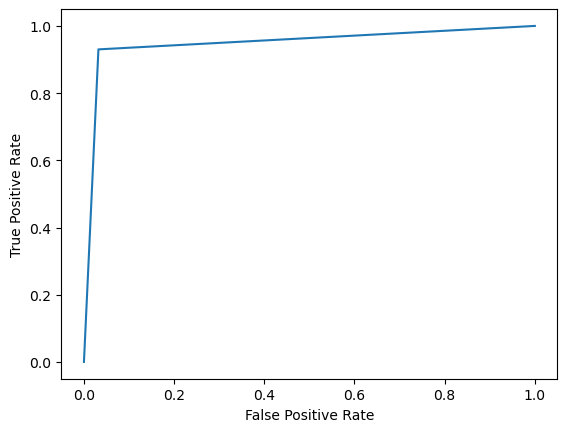

In [65]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()